# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# print(cities)


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
baseurl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# create setting and desired_keys
settings = {'units':'Imperial','appid':api_key}
summary = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']


In [4]:

cloudiness = []
country = []
date = []
humidity = []
maxtemp = []
windspeed = []
lat =[]
lng =[]
citylist = []


In [5]:

print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    cityurl = f"{baseurl}&q={city}"
    print(f"Processing Record #{counter} ㅣ {city}")
    print(cityurl)
    try:
        cityjson = ow.get_current(city, **settings)
        citydata = cityjson(*summary)
        cloudiness.append(citydata[0])
        country.append(citydata[1])
        date.append(citydata[2])
        humidity.append(citydata[3])
        maxtemp.append(citydata[4])
        windspeed.append(citydata[5])
        lat.append(citydata[6])
        lng.append(citydata[7])
        citylist.append(city)
    except HTTPError:
        print('City not found. Skipping...')

    counter += 1
    
print("---------------------------")
print("Data Retrieval Complete")


Beginning Data Retrieval
---------------------
Processing Record #1 ㅣ rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=rikitea
Processing Record #2 ㅣ yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=yumen
Processing Record #3 ㅣ hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=hithadhoo
Processing Record #4 ㅣ albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=albany
Processing Record #5 ㅣ den helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=den helder
Processing Record #6 ㅣ muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=muravlenko
Processing Record #7 ㅣ inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record #57 ㅣ vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=vila velha
Processing Record #58 ㅣ sakassou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=sakassou
Processing Record #59 ㅣ tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=tocopilla
Processing Record #60 ㅣ horqueta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=horqueta
Processing Record #61 ㅣ souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=souillac
Processing Record #62 ㅣ machinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=machinga
Processing Record #63 ㅣ mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04

Processing Record #114 ㅣ khandagayty
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=khandagayty
Processing Record #115 ㅣ black river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=black river
Processing Record #116 ㅣ ilukste
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=ilukste
Processing Record #117 ㅣ zhanatas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=zhanatas
City not found. Skipping...
Processing Record #118 ㅣ holme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=holme
Processing Record #119 ㅣ sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=sorland
Processing Record #120 ㅣ atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record #169 ㅣ muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=muli
Processing Record #170 ㅣ borsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=borsa
Processing Record #171 ㅣ jatai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=jatai
Processing Record #172 ㅣ khuzhir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=khuzhir
Processing Record #173 ㅣ seguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=seguela
Processing Record #174 ㅣ suez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=suez
Processing Record #175 ㅣ adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=adrar
Processing Recor

City not found. Skipping...
Processing Record #224 ㅣ kabinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=kabinda
Processing Record #225 ㅣ asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=asyut
Processing Record #226 ㅣ aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=aklavik
Processing Record #227 ㅣ iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=iqaluit
Processing Record #228 ㅣ teodoro sampaio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=teodoro sampaio
Processing Record #229 ㅣ baie-saint-paul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=baie-saint-paul
Processing Record #230 ㅣ la esperanza
http://api.openweathermap.org/data/2.5/wea

Processing Record #278 ㅣ butembo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=butembo
Processing Record #279 ㅣ leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=leshukonskoye
Processing Record #280 ㅣ armacao dos buzios
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=armacao dos buzios
City not found. Skipping...
Processing Record #281 ㅣ alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=alekseyevsk
Processing Record #282 ㅣ lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=lata
Processing Record #283 ㅣ riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=riyadh
Processing Record #284 ㅣ matameye
http://api.openweathermap.org/data/2.5/w

Processing Record #334 ㅣ dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=dicabisagan
Processing Record #335 ㅣ lokosovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=lokosovo
Processing Record #336 ㅣ saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=saint-pierre
Processing Record #337 ㅣ pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=pisco
Processing Record #338 ㅣ medicine hat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=medicine hat
Processing Record #339 ㅣ nevelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=nevelsk
Processing Record #340 ㅣ southbridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece

Processing Record #390 ㅣ kumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=kumba
Processing Record #391 ㅣ kintampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=kintampo
Processing Record #392 ㅣ tidore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=tidore
City not found. Skipping...
Processing Record #393 ㅣ isabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=isabela
Processing Record #394 ㅣ neral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=neral
Processing Record #395 ㅣ atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=atherton
Processing Record #396 ㅣ karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f015

Processing Record #447 ㅣ aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=aksu
Processing Record #448 ㅣ camara de lobos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=camara de lobos
Processing Record #449 ㅣ urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=urengoy
Processing Record #450 ㅣ osorno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=osorno
Processing Record #451 ㅣ maumere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=maumere
Processing Record #452 ㅣ kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=kloulklubed
Processing Record #453 ㅣ paratinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e0

City not found. Skipping...
Processing Record #504 ㅣ mioveni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=mioveni
Processing Record #505 ㅣ nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=nioro
Processing Record #506 ㅣ sinnai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=sinnai
Processing Record #507 ㅣ moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=moron
Processing Record #508 ㅣ leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=leh
Processing Record #509 ㅣ palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=palmer
Processing Record #510 ㅣ merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b34

City not found. Skipping...
Processing Record #561 ㅣ ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=ornskoldsvik
Processing Record #562 ㅣ wamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=wamba
Processing Record #563 ㅣ one hundred mile house
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=one hundred mile house
City not found. Skipping...
Processing Record #564 ㅣ emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=emba
Processing Record #565 ㅣ padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=padang
Processing Record #566 ㅣ boynton beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=boynton beach
Processing Record #567 ㅣ melfi
http://ap

Processing Record #617 ㅣ ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=ponta delgada
Processing Record #618 ㅣ zhizdra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=zhizdra
Processing Record #619 ㅣ aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=aykhal
Processing Record #620 ㅣ saurimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=saurimo
Processing Record #621 ㅣ shush
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=shush
Processing Record #622 ㅣ serebryansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04143046b3413196&q=serebryansk
Processing Record #623 ㅣ codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67ece238f0159e6e04

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = pd.DataFrame({"City":citylist, "Cloudiness":cloudiness, 
                          "Country":country, "Date":date, "Humidity":humidity,
                          "Lat": lat, "Lng":lng, "Max Temp":maxtemp, 
                          "Wind Speed": windspeed})
len(city_data)


576

In [7]:
city_data.count()


City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [8]:
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,12,PF,1562648396,85,-23.12,-134.97,72.94,26.11
1,yumen,0,CN,1562648151,19,40.29,97.04,82.66,18.28
2,hithadhoo,12,MV,1562648396,77,-0.60,73.08,84.10,16.53
3,albany,1,US,1562648396,77,42.65,-73.75,68.00,3.71
4,den helder,90,NL,1562648109,71,52.96,4.76,57.20,5.82
5,muravlenko,100,RU,1562648397,51,63.79,74.50,58.72,9.98
6,inta,57,RU,1562648397,49,66.04,60.13,57.82,7.20
7,bealanana,38,MG,1562648397,67,-14.54,48.75,72.58,2.15
8,mataura,100,NZ,1562648397,89,-46.19,168.86,48.00,11.01
9,salalah,75,OM,1562648397,79,17.01,54.10,84.20,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

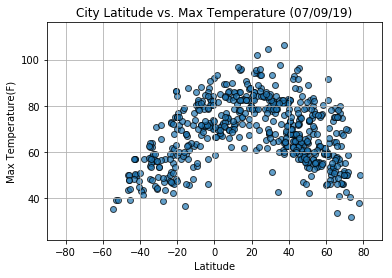

In [9]:
# Build a scatter plot and save figure

plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor="black", alpha=0.7)
plt.xlim(-90, 90)
plt.ylim(min(city_data["Max Temp"])-10, max(city_data["Max Temp"]+10))
plt.grid()

plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.savefig("lat_maxtemp")
plt.show()


#### Latitude vs. Humidity Plot

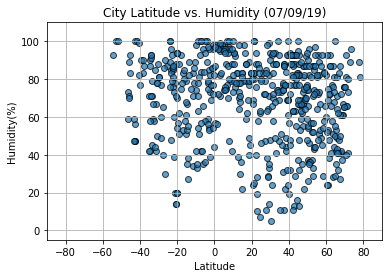

In [10]:
# Build a scatter plot and save figure

plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor="black", alpha=0.7)
plt.xlim(-90, 90)
plt.ylim(min(city_data["Humidity"])-10, max(city_data["Humidity"]+10))
plt.grid()

plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y')})") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig("lat_humidity")
plt.show()


#### Latitude vs. Cloudiness Plot

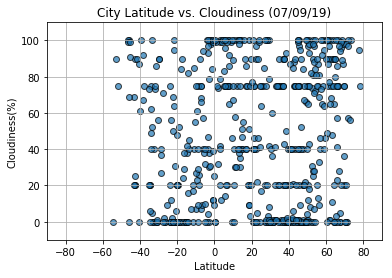

In [11]:
# Build a scatter plot and save figure

plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor="black", alpha=0.7)
plt.xlim(-90, 90)
plt.ylim(min(city_data["Cloudiness"]-10), max(city_data["Cloudiness"]+10))
plt.grid()

plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig("lat_cloudiness")
plt.show()


#### Latitude vs. Wind Speed Plot

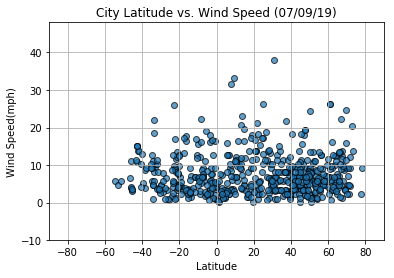

In [12]:
# Build a scatter plot and save figure

plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor="black", alpha=0.7)
plt.xlim(-90, 90)
plt.ylim(min(city_data["Wind Speed"])-10, max(city_data["Wind Speed"]+10))
plt.grid()

plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.savefig("lat_windspeed")
plt.show()


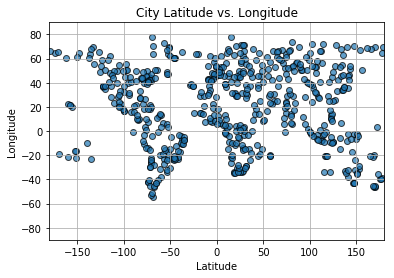

In [13]:
# cities map to see the distribution of the randomly selected cities
# Build a scatter plot and save figure

plt.scatter(city_data["Lng"], city_data["Lat"], edgecolor="black", alpha=0.7)
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.grid()

plt.title("City Latitude vs. Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()


In [14]:
# Save as a csv

output_data_file = city_data.to_csv("output_data/cities.csv", 
                                    encoding="utf-8", index=False)

In [15]:
# The End